# Projet info Catry Monnier Proba V


## I. Partie théorique.

#### 1.
La loi des grands nombres nous donne que:
   pour $ (X_{n})_{n\in\mathbb{N}*}$ suite de variables indépendantes de même loi, intégrables:
   $\frac {Z_{1}+ ... + Z_{n}}{n}$ converge en moyenne et presque sûrement vers $\mathbb{E}(X)$. La moyenne empirique des simulations conditionnelles approxime donc bien l'espérance conditionnelle sachant les profondeurs $z(x_{j_{1}}, ..., z(x_{j_{n}})$
   


#### 2.
On suppose qu'on connait par observation les profondeurs $Z(x_{j_{1}}) = z_{j_{1}}, ..., Z(x_{j_{n}}) = z_{j_{}n}$.

On se ramène à la formule explicitée dans le chapitre Probabilités IV:
    Notons d'abord $k = N - n$
    Alors, quitte à réarranger les indices, on peut obtenir le vecteur aléatoire gaussien U comme concaténation des vecteurs:
    
$V = (Z(x_{i}), i \in \lbrace { 1,...,N \rbrace} \backslash \{j_{1}, ..., j_{n}\}$ et $ W = (Z(x_{j_{1}}), ..., Z(x_{j_{n}}))$

La matrice D de covariance de U possède les mêmes racines que Z, elle est donc également définie positive. On note $w = (z_{j_{1}}, ..., z_{j_{}n})$

En notant alors $ \begin{equation*}
                D = \begin{pmatrix}
                                   D_V & D_{V,W} \\
                                   D_{W,V} & D_W 
                    \end{pmatrix}
                   \end{equation*}$
                   
On obtient d'après le chapitre probabilités IV : 

$$\begin{equation}
\boxed{f_{Y|=w}(y) = \frac{1}{(2\pi)^{k/2}\sqrt{\det (DS_V)}}\exp \left(-\frac{1}{2}\left(y - \psi(w)\right)^t DS_V^{-1}\left(y - \psi(w))\right)\right)}
\end{equation}$$
où $\begin{equation}
\boxed{DS_V = D_V - D_{V,W}D_Z^{-1}D_{W,V}}
\end{equation}$ et $\begin{equation}
\boxed{\psi(w) = (\mu + D_{V,W}D_Z^{-1}(w-\mu))}
\end{equation}$
 

#### 3.  
Y est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1.

Alors m + RY est un vecteur gaussien comme combinaison linéaire de vecteur gaussiens d'espérance $\mathbb{E}(m + RY) = \mathbb{E}(m) + \mathbb{E}(RY) = m + R \mathbb{E}(Y) =\begin{equation}
\boxed{m = \mathbb{E}(m + RY) }\end{equation} $ et de variance $\mathbb{V}(m + RY) = \mathbb{E}((R,Y)^2) = R Y Y^t R^t = R I R^t = \begin{equation}
\boxed{RR^t = \mathbb{V}(m + RY)}\end{equation}, $ 

#### 4.
Supposons qu'on veuille simuler un vecteur aléatoire gaussien de taille p, d'espérance le vecteur contenant p fois m et de variance la matrice $p x p $ définie positive C.
 
 i) C est définie positive, on peut trouver D diagonale d'élements strictements positifs, P orthogonale telles que $PD^{1/2}D^{1/2}P^{-1} = C$. 
D'après la question précédente, le vecteur gaussien $Z = m + PD^{1/2}Y$ vérifie ces conditions, pour Y vecteur aléatoire gaussien de taille p dont les composantes sont d'espérance nulle et de variance 1.

 ii)Pour simuler Y, on applique l'algorithme de Box-Muller. Si p est pair, on simule p/2 paires de variables aléatoires indépendantes $U_i, V_i$ de loi uniforme sur $\left[0, 1\right[ $. Pour tout i on obtient alors $Y_{2i} = \sqrt{-2\ln(U_i)}\cos\left(2\pi V_i\right)$ et $Y_{2i+1} = \sqrt{-2\ln(U_i)}\sin\left(2\pi V_i\right)$. Si p est impair, on procède de même pour (p-1)/2, et on simule un dernière fois une variable aléatoire U_p de loi uniforme sur $\left[0, 1\right[$, indépendante des précédentes, pour compléter. Le caractère indépendant des variables aléatoires de loi gaussiennes crée est du au caractère mesurable des fonctions $ : U_i, V_i , i\in \{ 1, p/2 \} \mapsto Y_j , j\in \{ 1, p\} $ et $ :  \left \{ \begin {array} {r c l} U_i, V_i , i\in \{ 1, (p - 1)/2 \} \mapsto Y_j , j\in \{ 1, p\} \\ U_p \mapsto Y_p \end{array} \right.$
 
iii) Il faut ensuite savoir comment simuler ces variables aléatoires indépendantes de loi uniforme sur $ [0, 1[$. Il existe pour cela des algorithmes plus ou moins performants tels que la méthode par congruence de Lehmer ou la méthode de Mersenne-Twister. Ces algorithme produisent des variables aléatoires approximativement indépendantes : il s'agit de bien choisir certains paramètres.

En pratique, il faut bien sûr procèder aux trois étapes dans le sens inverse de celui présenté.
    


## II. Implémentation.

In [97]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt
#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12
#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([-11,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux componsantes non observées
18
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


#### 1.


In [98]:
def C(h):
    return sigma2 * np.exp(-np.abs(h)/a)

def covariance(M, a = 50, sigma2 = 12):
    Cov = np.zeros(np.shape(M))
    for i in range(len(Cov)):
        for j in range(len(Cov[0])):
            Cov[i][j] = C(M[i][j])
    return Cov

#### 2. 

In [99]:
def matrix_distance(abs1, abs2):
    m = len(abs1)
    n = len(abs2)
    M = np.zeros(m*n).reshape(m, n)
    for i in range(m):
        for j in range(n):
            M[i, j] = abs1[i] - abs2[j]
    return M


M = matrix_distance(discretization, discretization)
print(f'La matrice de distance vaut {M}')

La matrice de distance vaut [[   0.   -5.  -10. ... -490. -495. -500.]
 [   5.    0.   -5. ... -485. -490. -495.]
 [  10.    5.    0. ... -480. -485. -490.]
 ...
 [ 490.  485.  480. ...    0.   -5.  -10.]
 [ 495.  490.  485. ...    5.    0.   -5.]
 [ 500.  495.  490. ...   10.    5.    0.]]


#### 3.

In [100]:
Cov = covariance(M)

print(f'La matrice de covariance vaut {Cov}')
    

La matrice de covariance vaut [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


#### 4.

In [101]:

###entre les observations :

M_obs = matrix_distance(observation_indexes, observation_indexes)
print(M_obs)
C_obs = covariance(M_obs)

###entre les observations et les inconnues :

unknown_indexes = []
for x in discretization_indexes:
    if x not in observation_indexes :  #On ne retient que les inconnues
        unknown_indexes.append(x)
    

unknown_indexes = np.array(unknown_indexes)
unknown_indexes = unknown_indexes.astype(int)
unknown = unknown_indexes * Delta

M_obsinc = matrix_distance(observation_indexes, unknown)
print(M_obsinc)
C_obsinc = covariance(M_obsinc)
print(C_obsinc)
    
###entre les inconnues

M_inc = matrix_distance(unknown, unknown)
C_inc = covariance(M_inc)




[[   0.  -20.  -40.  -60.  -80. -100.]
 [  20.    0.  -20.  -40.  -60.  -80.]
 [  40.   20.    0.  -20.  -40.  -60.]
 [  60.   40.   20.    0.  -20.  -40.]
 [  80.   60.   40.   20.    0.  -20.]
 [ 100.   80.   60.   40.   20.    0.]]
[[  -5.  -10.  -15.  -20.  -25.  -30.  -35.  -40.  -45.  -50.  -55.  -60.
   -65.  -70.  -75.  -80.  -85.  -90.  -95. -105. -110. -115. -120. -125.
  -130. -135. -140. -145. -150. -155. -160. -165. -170. -175. -180. -185.
  -190. -195. -205. -210. -215. -220. -225. -230. -235. -240. -245. -250.
  -255. -260. -265. -270. -275. -280. -285. -290. -295. -305. -310. -315.
  -320. -325. -330. -335. -340. -345. -350. -355. -360. -365. -370. -375.
  -380. -385. -390. -395. -405. -410. -415. -420. -425. -430. -435. -440.
  -445. -450. -455. -460. -465. -470. -475. -480. -485. -490. -495.]
 [  15.   10.    5.    0.   -5.  -10.  -15.  -20.  -25.  -30.  -35.  -40.
   -45.  -50.  -55.  -60.  -65.  -70.  -75.  -85.  -90.  -95. -100. -105.
  -110. -115. -120. -125. -130

#### 5.
D'après la question théorique 2., la loi du vecteur aléatoire des composantes inconnues sachant les observations est une loi gaussienne d'espérance $\psi (w) = (\mu + C_{V,W}C_W^{-1}(w-\mu)) $ avec les notations de la question 2., (en nommant les matrices de covariance C.. plutôt que D.., vu qu'il n'y a pas de confusion avec la matrice de covariance C pour toute les profondeurs, qui n'est pas calculée ici).
D'où :

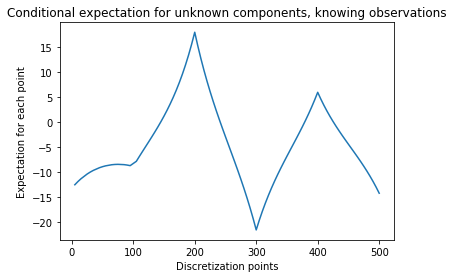

In [102]:
#5

#Calcul des espérances de V (vecteur des composantes non observées) et de W
#(composantes observées)

E_V = np.array([mu] * (len(discretization_indexes) - len(observation_indexes))).T
E_W = np.array([mu] * len(observation_indexes)).T
W = depth.T
C_W = C_obs


C_VW = np.array([[Cov[i][j] for j in observation_indexes] for i in inconnues_indexes])
F = np.array(Z - EZ)

E_VW = E_V - C_VW.dot(np.linalg.inv(C_W)).dot(F)
V = np.array([discretization[i] for i in inconnues_indexes])

plt.plot(V, E_VW)
plt.xlabel('Discretization points')
plt.ylabel('Expectation for each point')
plt.title('Conditional expectation for unknown components, knowing observations')
plt.show()

Où on trace l'espérance conditionnelle en fonction du point de discretisation

#### 6.
De même d'après la question théorique 2., la variance conditionnelle en fonction de la position est donnée par $(C_V - C_{V,W}D_Z^{-1}C_{W,V})$

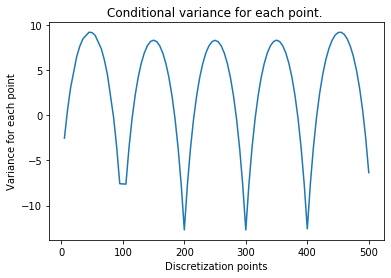

In [103]:
C_V= C_inc
CovVar = C_V - C_VW.dot(np.linalg.inv(C_W)).dot(C_VW.T)
variance_conditionnelle = np.array([CovVar[i][i] for i in range(len(CovVar))])
plt.plot(V, variance_conditionnelle)
plt.xlabel('Discretization points')
plt.ylabel('Variance for each point')
plt.title('Conditional variance for each point. ')
plt.show()

#### 7. 
On applique l'algorithme évoqué Q4. Partie théorique. On utilise la méthode de Cholesky pour obtenir une matrice R telle que $RR^t = CovVar $. Ici nous obtenons un message d'erreur et n'avons pas trouvé de solution.

In [104]:
CovVar, np.linalg.eigvals(CovVar)

(array([[-2.51729417, -2.00783951, -1.51847998, ...,  0.02138109,
          0.02005534,  0.0189303 ],
        [-2.00783951,  0.57741149,  0.76443942, ...,  0.02276388,
          0.02138109,  0.02021229],
        [-1.51847998,  0.76443942,  3.05500958, ...,  0.0243745 ,
          0.02292084,  0.02169658],
        ...,
        [ 0.02138109,  0.02276388,  0.0243745 , ...,  0.57741149,
         -2.00783951, -4.61318564],
        [ 0.02005534,  0.02138109,  0.02292084, ..., -2.00783951,
         -2.51729417, -5.45594475],
        [ 0.0189303 ,  0.02021229,  0.02169658, ..., -4.61318564,
         -5.45594475, -6.35330879]]),
 array([ 139.27048126, -142.50427575, -122.35626348,  -78.05088771,
          73.75441633,   66.43571889,   54.57134442,   45.87853546,
         -27.15034071,   22.94660894,   18.6260458 ,   17.64071484,
          15.53396998,   13.34079228,   11.55062119,    9.60430236,
           9.20551933,    7.79908448,    7.25334096,    6.16156953,
           5.74728354,    5.25099

On voit en effet que les valeurs propres ne sont pas toutes positives, ce qui implique que la matrice n'est pas définie positive.

In [109]:
new_depth


array([-13,  -1,  -1, -10,  -7,  -2])

In [108]:

def simulation():
    len_H = N - len(observation_indexes)
    H = np.zeros(len_H) # On va construire le vecteur gaussien 0, 1;
    for i in range (len_H // 2):
        a, b = np.random.uniform(), np.random.uniform()
        H[2*i], H[2*i+1] = np.sqrt(-2*np.log(a))*np.cos(2*np.pi*b), np.sqrt(-2*np.log(a))*np.sin(2*np.pi*b)
        if len_H%2 == 1 :
            a, b = np.random.uniform(), np.random.uniform()
            H[len_H -1] = np.sqrt(-2*np.log(a))*np.cos(2*np.pi*b)

    #On obtient le vecteur gaussien d'espérance et variance calculées plus haut
    return( C_VW.dot(np.linalg.inv(C_W)).dot(depth - mu) + np.linalg.cholesky(CovVar).dot(H) )

## Le programme renvoie 'Matrix is not positive definite'. Je ne sais pas comment y remédier.
print(simulation())

LinAlgError: Matrix is not positive definite

Tachons de remédier à ce problème en changeant les profondeurs observées. Peut être que par chance on tombera sur une combinaison qui fonctionne.

In [112]:
count = 0
local_CovVar = CovVar
while count < 100  and not np.all(np.linalg.eigvals(local_CovVar) > 0) :
    depth = np.array([- np.random.randint(15) for i in range(6)])   
    
    # On repète ensuite toute les étapes vues plus haut avec les nouvelles observations:
                            
    ###entre les observations :

    M_obs = matrix_distance(observation_indexes, observation_indexes)
    C_obs = covariance(M_obs)

    ###entre les observations et les inconnues :

    unknown_indexes = []
    for x in discretization_indexes:
        if x not in observation_indexes :  #On ne retient que les inconnues
            unknown_indexes.append(x)


    unknown_indexes = np.array(unknown_indexes)
    unknown_indexes = unknown_indexes.astype(int)
    unknown = unknown_indexes * Delta

    M_obsinc = matrix_distance(observation_indexes, unknown)
    C_obsinc = covariance(M_obsinc)
    
    ###entre les inconnues

    M_inc = matrix_distance(unknown, unknown)
    C_inc = covariance(M_inc)
    C_V= C_inc
    W = depth.T
    C_W = C_obs
    C_VW = np.array([[Cov[i][j] for j in observation_indexes] for i in inconnues_indexes])
                     
    local_CovVar = C_V - C_VW.dot(np.linalg.inv(C_W)).dot(C_VW.T)
    count +=1
print(depth)
new_depth = depth
new_CovVar = local_CovVar
print(np.linalg.eigvals(new_CovVar))

[ -6  -7  -8  -6  -8 -10]
[ 139.27048126 -142.50427575 -122.35626348  -78.05088771   73.75441633
   66.43571889   54.57134442   45.87853546  -27.15034071   22.94660894
   18.6260458    17.64071484   15.53396998   13.34079228   11.55062119
    9.60430236    9.20551933    7.79908448    7.25334096    6.16156953
    5.74728354    5.25099221    5.04000242    4.63076264    4.22818214
    3.70287357    3.669224      3.14053424    3.09892619    2.77488031
    2.70677713    2.58629094    2.47810323    2.39317347    2.26315634
    2.01177833    1.98950811    1.83709591    1.81499017    1.74334736
    1.59483741    1.5486949     1.53382933    1.46200325    1.45888008
    1.31214208    1.28940237    1.25590679    1.23601304    1.21330221
    1.11103929    1.09933126    1.08259843    1.05526238    1.05098272
    0.96593857    0.95084927    0.94754299    0.93501357    0.92189909
    0.86653519    0.85863095    0.84420889    0.82995793    0.8347257
    0.78301533    0.77166716    0.77016289    0.7599

La boucle semble donner un vecteur d'observations valide, mais il possède apparemment des valeurs propres négatives. Cette bidouille ne marche pas non plus.

#### 8.


In [41]:
def longueur(profondeur, pas):
    S = 0
    for i in range(1, len(profondeur)):
        S += np.sqrt(pas**2 + (profondeur[i] - profondeur[i-1])**2)
    return S

#### 9.
Ici nous comprenons "calculer la longueur du câble à partir de 100 simulations comme réaliser 100 simulations et calculer la longueur pour chacune d'elle. Nous retournerions une liste des 100 longueurs, si simulation marchait.

In [87]:
#on va stocker des couples (profondeurs inconnues simulées et observées,
#profondeurs inconnues simulées seulement)correspondant à chaque simulation

stockage_profondeurs = [] 

for i in range(100):
    #on va reconstituer un vecteur de profondeur, avec les observations et les
    #profondeurs simulées ordonnées
    profondeurs = []
    unknown = simulation()
    
    for j in range(101):
        if j not in observation_indexes :
            profondeurs.append(simulation[j])
        else:
            profondeurs.append(depth[j/20])
    stockage_profondeurs.append((profondeurs, unknown))

#On calcule les longueurs pour 100 simulations
stockage_longueurs = [longeur(profondeurs, 5) for profondeurs, unknown in stockage_profondeurs]
#On calcule l'espérance conditionnelle de la longueur
lmoy_estimée = sum(stockage_longueurs)/100 

#On calcule la longueur de lespérance conditionnelle
profondeurs_esperance_cond = []
for j in range(101):
        if j not in observation_indexes :
            profondeurs_esperance_cond.append(E)
        else:
            profondeurs_esperance_cond.append(depth[j/20])
lmoy_esp = longueur(E_VW, 5)


print(f"les longueurs de câble pour 100 simulations sont{stockage_profondeurs}")
print(f"l'espérance conditionnelle de la longueur est {lmoy_estimée}")
print(f"la longueur de lespérance conditionnelle est {lmoy_esp}")

        
            
            

LinAlgError: Matrix is not positive definite

#### 10.


In [86]:
Y = [sum(stockage_longueurs[:i]/i for i in range(101))]
X = [i for i in range(101)]
plt.plot(X, Y)
plt.xlabel('Nombre de simulation')
plt.ylabel('Termes de Mn')
plt.title('Termes de Mn.')
plt.show()

NameError: name 'stockage_longueurs' is not defined

#### 11.

In [89]:
plt.hist(stockage_longueurs, bins = range(10), color = 'blue',
            edgecolor = 'black')
pyplot.xlabel('Longueur')
pyplot.ylabel('poids')
pyplot.title('Histogramme des longueurs de câbles générées')

NameError: name 'stockage_longueurs' is not defined

#### 12.
On peut obtenir l'intervalle de confiance à 95% :
¤ Mathématiquement d'après la loi des grands nombres à partir de la moyenne et de l'ecart-type des différentes profondeurs simulées. $I = \left[ \overline{x} - 2 \frac{\sigma}{\sqrt{n}}; \overline{x} + 2 \frac{\sigma}{\sqrt{n}}\right]$. La longueur moyenne est connue, on calcule l'écart-type

¤ Nous n'avons pas d'autre manière.


In [ ]:
#longueur quadratique moyenne
stockage_longueurs_quadratique = [longueur ** 2 for longueur in stockage_longueur]
longueur_quad_moyenne = sum(stockage_longueurs_quadratique)/100
#ecart-type
ecart_type = (longueur_quad-moyenne - lmoy_estimée ** 2) ** (0.5)
#intervalle de confiance
print(f"I = [{lmoy_estimée - 2*ecart_type/(100**0.5)}; {lmoy_estimée + 2*ecart_type/(100**0.5)}])

#### 13.
Il y a peut-être un moyen de répondre à cette question sans connaitre les valeurs moyennes, mais nous ne savons pas lequel.

#### 14.
Nous pourrions recopier le code des questions précédentes en modifiant 100 par 1000 puis 10000, mais sans les résultats nous ne pouvons commenter intelligemment.
On peut supposer qu'en augmentant le nombre de simulations, 
1O: La suite Mn approche de plus en plus fidèlement une valeur moyenne
11:L'histogramme est de plus en plus resserré autour de la valeur moyenne
12: L'intervalle dont la longueur est en 1/(n¨0.5) se réduit
13: la probabilité de dépasser 525m diminue, si tant es que la valeur moyenne soit inférieure à 525. (augmente sinon)